<a href="https://www.kaggle.com/code/utkarshx27/slid-dataset?scriptVersionId=128621965" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/survey-of-labour-and-income-dynamics/SLID.csv


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('/kaggle/input/survey-of-labour-and-income-dynamics/SLID.csv')
df.head()

,Unnamed: 0,wages,education,age,sex,language
0,1,10.56,15.0,40,Male,English
1,2,11.00,13.2,19,Male,English
2,3,NaN,16.0,49,Male,Other
3,4,17.76,14.0,46,Male,Other
4,5,NaN,8.0,71,Male,English


In [4]:
df.describe()

,Unnamed: 0,wages,education,age
count,7425.000000,4147.000000,7176.000000,7425.000000
mean,3713.000000,15.553082,12.496084,43.982761
std,2143.557207,7.883066,3.362506,17.694554
min,1.000000,2.300000,0.000000,16.000000
25%,1857.000000,9.235000,10.300000,30.000000
50%,3713.000000,14.090000,12.100000,41.000000
75%,5569.000000,19.800000,14.525000,57.000000
max,7425.000000,49.920000,20.000000,95.000000


In [5]:
df.isnull().sum()

Unnamed: 0       0
wages         3278
education      249
age              0
sex              0
language       121
dtype: int64

In [6]:
mean_wages = df['wages'].mean()
df['wages'] = df['wages'].fillna(mean_wages)
df = df.dropna(subset=['education', 'language'])


In [7]:
df_clean = df.copy()


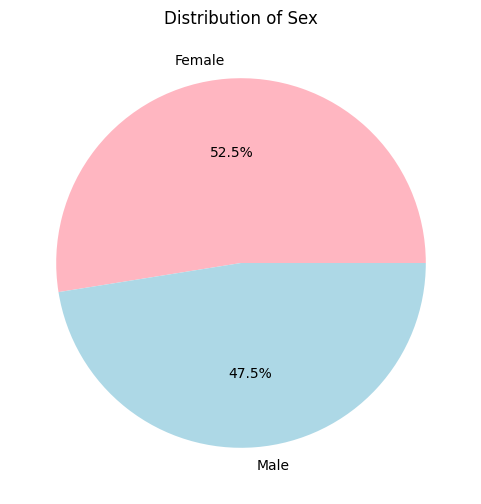

In [8]:
plt.figure(figsize=(6,6))
plt.title('Distribution of Sex')
sex_counts = df['sex'].value_counts()
labels = ['Female', 'Male']
colors = ['lightpink', 'lightblue']
plt.pie(sex_counts, labels=labels, colors=colors, autopct='%1.1f%%')
plt.show()

/tmp/ipykernel_20/3782376177.py:1: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['wages'], shade=True)


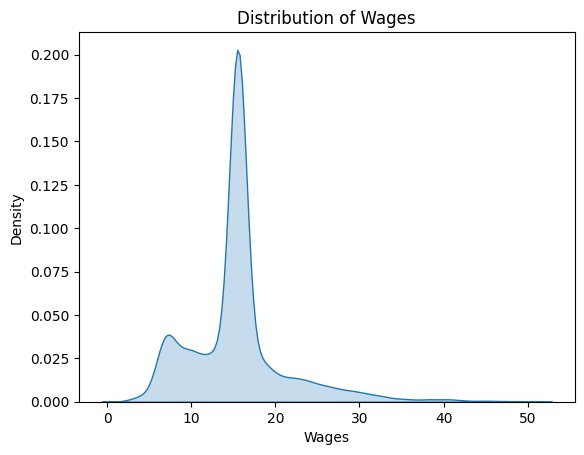

In [9]:
sns.kdeplot(df['wages'], shade=True)
plt.xlabel('Wages')
plt.ylabel('Density')
plt.title('Distribution of Wages')
plt.show()

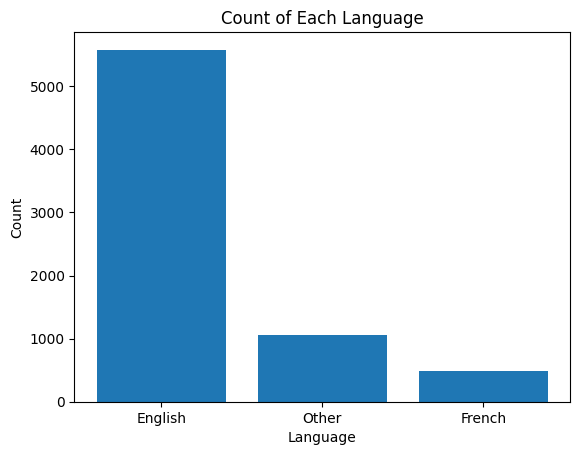

In [10]:
language_counts = df['language'].value_counts()
plt.bar(language_counts.index, language_counts.values)
plt.xlabel('Language')
plt.ylabel('Count')
plt.title('Count of Each Language')
plt.show()

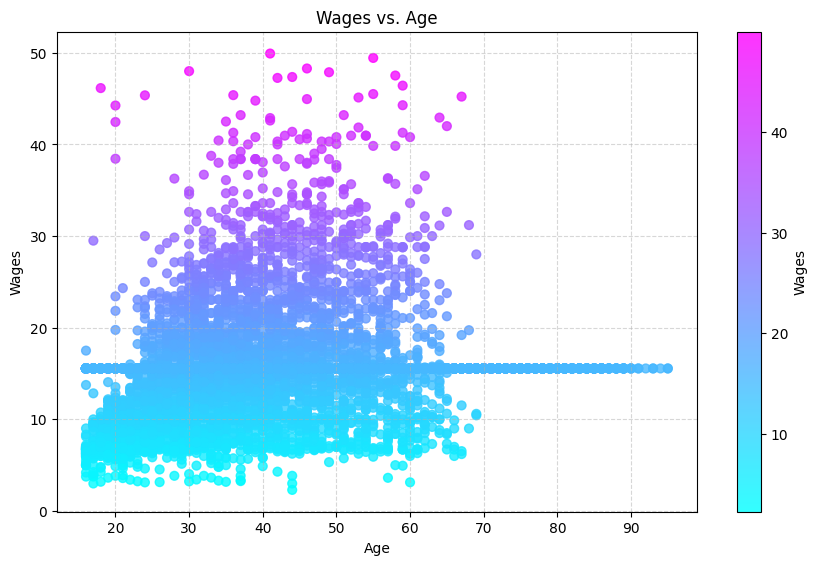

In [11]:
cmap = cm.get_cmap('cool')
plt.scatter(df['age'], df['wages'], s=40, c=df['wages'], cmap=cmap, alpha=0.8)

cbar = plt.colorbar()
cbar.set_label('Wages')
plt.xlabel('Age')
plt.ylabel('Wages')
plt.title('Wages vs. Age')
plt.grid(linestyle='--', alpha=0.5)
plt.subplots_adjust(bottom=0.1, left=0.1, right=0.9, top=0.9, wspace=0.2, hspace=0.3)
plt.gcf().set_size_inches(10, 6)

plt.show()


/tmp/ipykernel_20/162747739.py:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='education_range', y='wages', data=df_clean, ci=None)


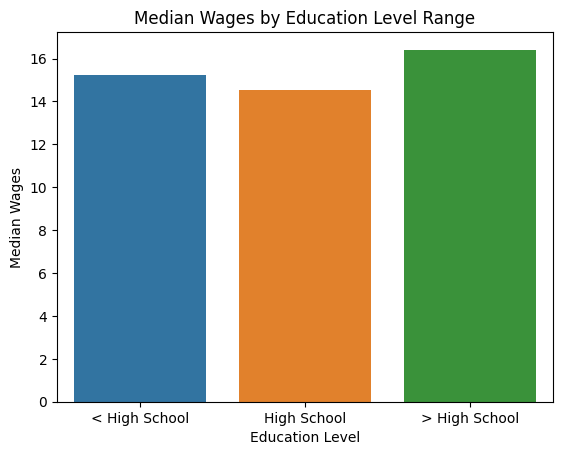

In [12]:
df_clean['education_range'] = pd.cut(df_clean['education'], bins=[0, 8, 12, 20], labels=['< High School', 'High School', '> High School'])
sns.barplot(x='education_range', y='wages', data=df_clean, ci=None)
plt.xlabel('Education Level')
plt.ylabel('Median Wages')
plt.title('Median Wages by Education Level Range')
plt.show()


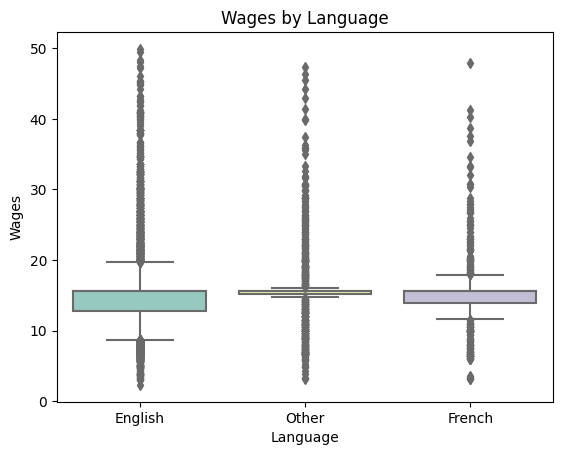

In [13]:
sns.boxplot(x='language', y='wages', data=df_clean, palette='Set3')
plt.xlabel('Language')
plt.ylabel('Wages')
plt.title('Wages by Language')
plt.show()
